In [ ]:
# KNN Algorithm
# k-NN(k-Nearest Neighbors) 알고리즘은 제일 간단한 머신러닝 알고리즘 (실제 비즈니스에선 사용X)
# 단순히 훈련할 데이터셋(training data set)저장하는 것이 머신러닝 모델을 만드는 것
# 새로운 데이터 포인트를 예측할 때, 훈련데이터셋으로 만들어 놓은 k-NN 모델에서 
# 가장 가까운 데이터 포인트 -> 즉, 최근접 이웃을 찾는 방법

# 단점:
# 훈련세트가 매우 크면 (특성 또는 샘플 데이터의 개수가 많으면) 예측이 느림
# 수백개의 특성을 가진 데이터셋과 희소한 데이터셋(특성값의 대부분이 0인 데이터셋)에선 잘 동작하지 않음
# 간단히 테스트할 용도로 사용하는 것이 적합하다.

# k-NN 모델 만들기
# fit: (X_train, y_train) => 훈련
# predict: (X) => 예측하기
# score: (X, y) => 점수 (실제 predict의 평균)

In [1]:
#필요 라이브러리 임포트
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
plt.rcParams['axes.unicode_minus'] = False

import platform
path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown OS')

D:\Bigdata2020\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
D:\Bigdata2020\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


D:\Bigdata2020\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


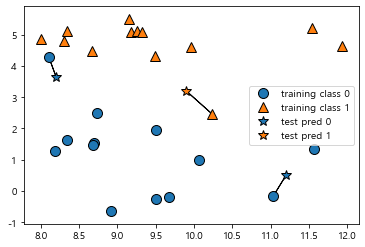

In [6]:
mglearn.plots.plot_knn_classification(n_neighbors=1) # n_neighbors : 이웃의 갯수
# forge 데이터셋에서 한점을 찍은 것임

# "별" 모양의 데이터들은 테스트 데이터로써 선을 이용해서 각 훈련된 데이터 포인터에서
# 가장 가까운 이웃과 선이 연결 됨

# n_neighbors 파라미터의 값을 변경하면 가장 가까운 여러개의 이웃이 선택되고,
# 둘 이상의 이웃이 선택되면 레이블 (분류결과 -그래프에서는 색생)을 정하기 위해 투표를 함

# 즉, 테스트 포인트 하나에 대해서 클래스 0(파란색)에 속한 이웃이 몇개인지,
# 클래스 1(주황색)에 속한 이웃이 몇 개인지를 셈. 그리고 이웃이 더 많은 클래스를 레이블로 지정.

# KNN 모델은 이웃갯수로 복잡도 조절
# 짝수인 경우 -> 거리로 측정하게 됨. [맨하탄 거리(L1방식, 직각거리), 유클리디언 거리(L2 Norm, 직선 거리)]

D:\Bigdata2020\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


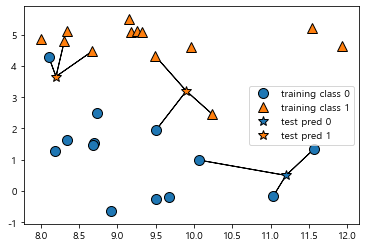

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [7]:
from sklearn.model_selection import train_test_split # 일반화 성능 평가를 위한 데이터 나누기

X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
# random_state: random seed값. 실무에서는 사용하지 않지만, 
# 여기에서 0으로 설정해준 이유는 example을 실행하면서 같은 값이 나오는것을 확인하기 위해서임.

D:\Bigdata2020\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [8]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)
# n_jobs: CPU 개수. 8core 면 8을 넣어주면 됨=> CPU 100% 활용

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [10]:
print(y_test) # 실제 값: [1 0 1 0 1 1 0]
print("테스트 세트 예측: {}".format(clf.predict(X_test))) # 예측 값: [1 0 1 0 1 0 0]

테스트 세트 예측: [1 0 1 0 1 0 0]


In [11]:
# 방금 만든 모델이 얼마나 잘 일반화되었는가 판단
# : score메서드에 테스트 데이터와 테스트 레이블을 넣어서 확인/검증
print("테스트 세트 정확도:{:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도:0.86


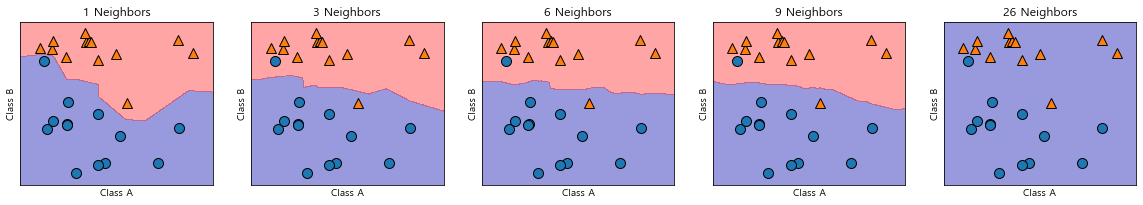

In [13]:
# 생성된 모델의 정확도는 86%. => 모델이 테스트 데이터셋에 있는 샘플 중 86%를 정확히 예측함.
# 이제 이웃의 수에 따라서 k-NN모델이 어떻게 데이터를 구분하는지 평면에 색을 칠해 경계를 나눠보자.
# 클래스 0과 클래스 1로 지정한 영역으로 나뉘는 경계를 결정 경계(decision boundary)라고 함.

fig, axes = plt.subplots(1, 5, figsize=(20,3)) # figsize는 그래프 크기

for n_neighbors, ax in zip([1,3,6,9,26], axes):
    # fit 메서드는 self반환을 하기 때문에 객체 생성과 메서드를 한 줄에 사용할 수 있음.
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{} Neighbors".format(n_neighbors))
    ax.set_xlabel("Class A")
    ax.set_ylabel("Class B")
    
# 분석
# 이웃이 1개인 경우: 결정경계가 훈련데이터에 가깝게 나눠지고 있음 -> 모델의 복잡도 낮음 (과대적합 가능성)
# 이웃이 3개인 경우: 결정경계가 1개일때보다 약간 부드러워짐. -> 복잡도 증가
# 이웃이 6개인 경우: 결정경계가 클래스들이 위치한 것과 비슷한 구격을 각각 나눠가진 것처럼 보임.
# 이웃이 9개인 경우: 결정경계가 6일때 보다 훨씬 완만해짐. 가운데 쯤에 있는 Class A 때문이라고 추정. 단순한 모델 (과소적합 가능성)
# 이웃이 26개인 경우(극단적 케이스): 모든 데이터를 하나로 구분하게 됨. k-nn은 이웃의 갯수로 투표를 하기 때문인것 같음. (복잡도 높음)

In [ ]:
# 유방암 데이터로 k-nn 알아보기

# 모델의 복잡도와 일반화 사이의 관계를 입증해보자.
# How? 이웃의 개수에 따라서 얼마나 k-NN이 잘 일반화 되는지 보고!

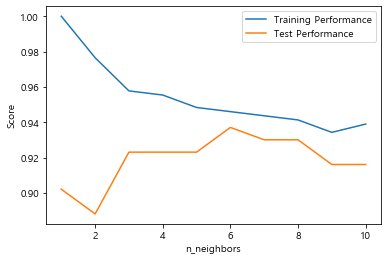

In [25]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
# stratify: target 데이터가 한쪽으로 취중되어 있지 않게 되도록. (target balance) 
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

# train, test score => epoch
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label ="Training Performance")
plt.plot(neighbors_settings, test_accuracy, label ="Test Performance")
plt.ylabel("Score")
plt.xlabel("n_neighbors")
plt.legend()

# 이웃의 개수가 적으면 훈련세트의 정확도는 높지만 테스트 세트의 정확도는 낮음 -> 과대 적합
# 이웃의 개수가 많아지면 모델이 단순해지고 훈련 정확도와 테스트 정확도가 동시에 낮아짐 -> 과소 적합
# 이웃이 1개인 경우에는 너무 모델을 복잡하게 만들어 낸다는 사실. 반대로 이웃을 10개 사용한다면 모델이 너무 단순해서 정확도가 나빠짐.
# 이 예제의 경우에는 이웃의 개수를 6으로 설정할 때, 가장 일반화가 잘 되었다고 봄. 

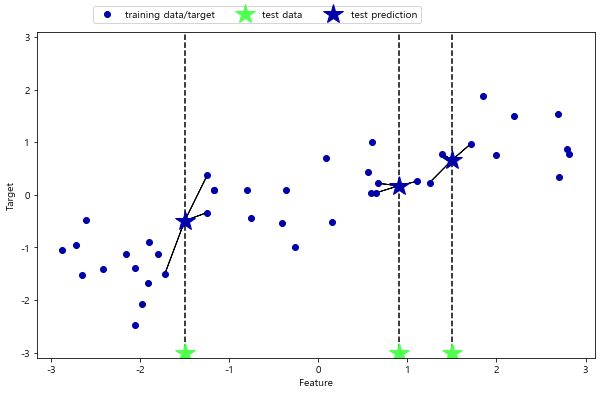

In [27]:
# k-NN Regression 
# k-NN 알고리즘은 회귀 분석을 위해서 사용함.
mglearn.plots.plot_knn_regression(n_neighbors=3)

# 파란색 원은 트레이닝 데이터, 초록색 별은 입력한 특성, 파란색 별은 입력한 특성에 대한 회귀 분석 결과
# k-NN 회귀는 이웃의 개수를 다수로 지정하면 이웃간의 평균이 그 예측값이 됨
# 이웃이 3개인 경우엔 가장 가까운 3개의 점을 찾아서 그 평균을 회귀 값으로 사용함

In [28]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors = 3)
reg.fit(X_train, y_train)

print("Test Set Prediction: \n{}".format(reg.predict(X_test)))

Test Set Prediction: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [29]:
# 회귀분석일 경우 return되는 score은 R^2(결정계수)임.
# 1은 예측이 완벽한 경우, 0은 훈련 세트의 출력값인 y_train의 평균으로만 예측하는 모델의 경우
print("Test Set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test Set R^2: 0.83


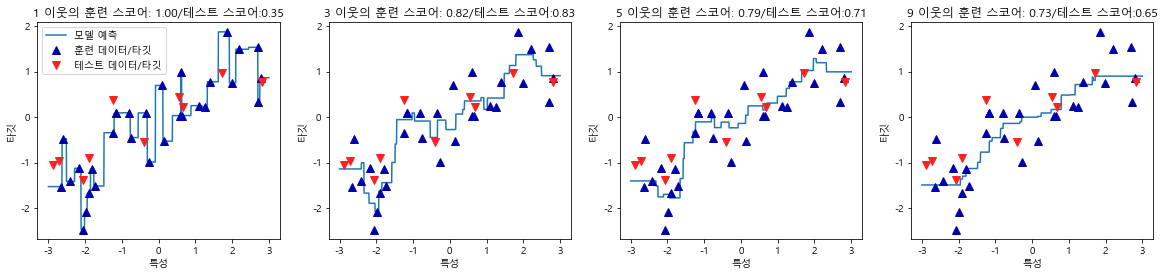

In [36]:
fig, axes = plt.subplots(1, 4, figsize=(20,4))

# -3과 3 사이에 1000개의 데이터 만들기 -> 테스트 용도
line = np.linspace(-3, 3, 1000).reshape(-1,1)

for n_neighbors, ax in zip([1,3,5,9], axes):
    # 이웃의 갯수를 1,3,5,9로 하여 예측하는 모델을 만듬
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    reg.fit(X_train, y_train)
    # 테스트 용도로 만든 데이터를 예측하고, 예측 결과를 선으로 표현
    ax.plot(line, reg.predict(line))
    # 훈련 데이터를 그래프에 그림
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    # 테스트 데이터를 그래프에 그림
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{} 이웃의 훈련 스코어: {:.2f}/테스트 스코어:{:.2f}".format(n_neighbors,reg.score(X_train, y_train), reg.score(X_test,y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
    
    axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc = "best")
    
# 분석
# 1) 이웃의 개수 1: 모델을 예측한 라인들이 모두 훈련 데이터를 지나감.
# -> 훈련세트의 각 데이터 포인트들이 예측에 주는 영향이 커서 매우 불안정한 예측이라 할 수 있음

# 이웃의 개수가 많아질수록 훈련 스코어가 점점 줄어드는 것을 볼 수 있음
# 그런데, 이웃을 많이 사용할수록 훈련데이터에 잘 맞지 않을 수 있지만, 더 안정적으로 예측할 수 있게 됨

# 이웃의 개수가 3개일 때는 적절히 훈련데이터와 테스트 데이터를 지나가는 모습을 볼 수 있음
# 그 이상의 이웃이 설정될수록 예측 라인들이 훈련데이터를 빗겨 지나가는 모습을 확인할 수 있음 (정확도 점점 떨어짐)